<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_17_Matplotlib Histograms.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Data Scientist Hourly Salaries (2.17.1)

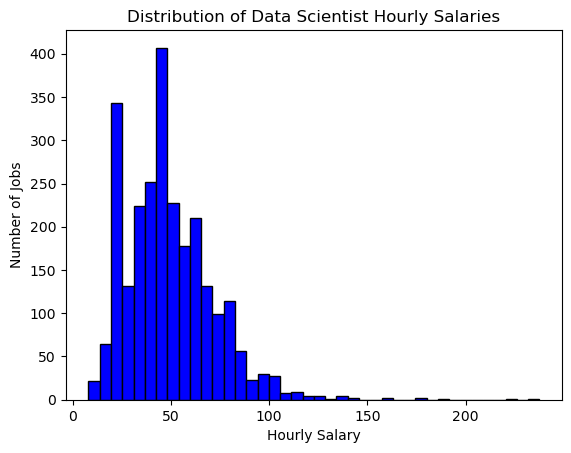

In [7]:
df_DS = df[df['job_title_short'] == 'Data Scientist']
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color= 'blue', edgecolor= 'black' )

plt.title('Distribution of Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

---

## 🟨 Job Postings by Number of Skills (2.17.2)

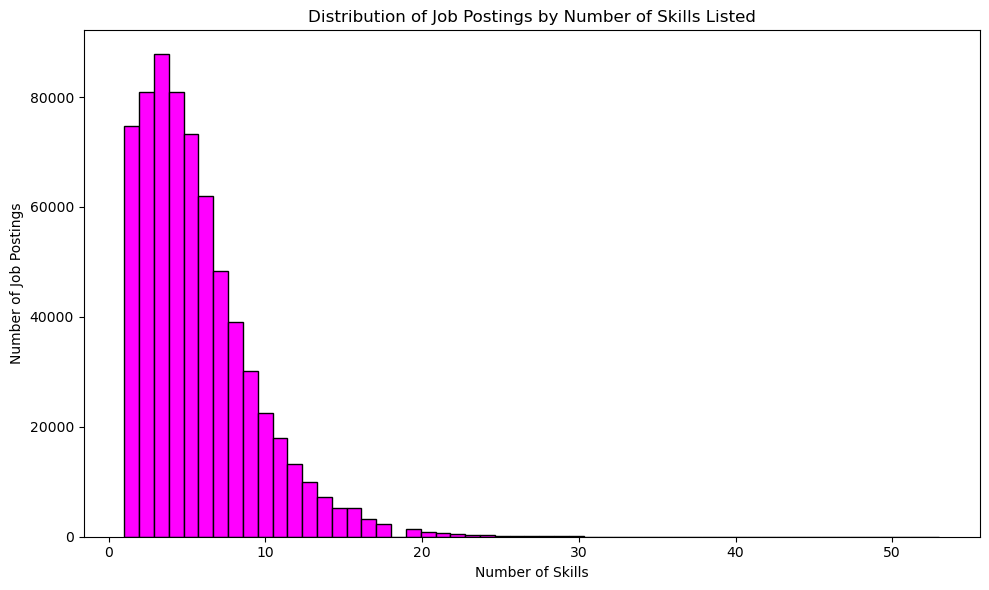

In [ ]:
df_skills = df[df['job_skills'].notna()].copy()

df_skills['num_skills'] = df_skills['job_skills'].apply(len)

df_skills['num_skills'].plot(
    kind='hist',
     bins=55,
    color='magenta',
    edgecolor='black',
    title='Distribution of Job Postings by Number of Skills Listed',
    figsize=(10, 6)
)

# Step 5: Customize axis labels
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()


---

## 🟥 Data Engineer Salaries (2.17.3)

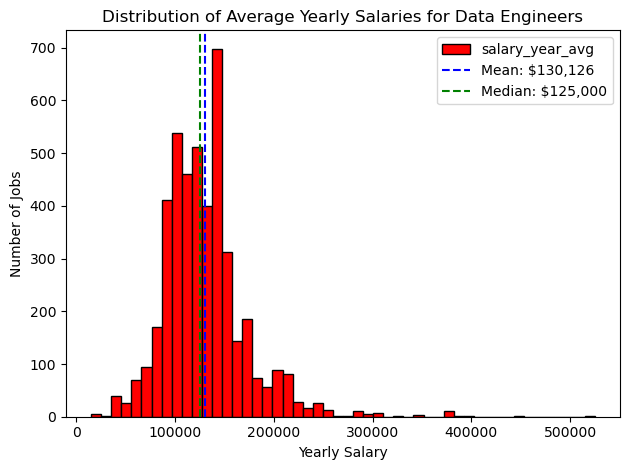

In [5]:
df_DE = df[(df['job_title_short'] == 'Data Engineer') & df['salary_year_avg'].notna()].copy()

mean_salary = df_DE['salary_year_avg'].mean()
median_salary= df_DE['salary_year_avg'].median()


df_DE['salary_year_avg'].plot(
    kind='hist',
    bins=50,
    color='red',
    edgecolor='black',
    title='Distribution of Average Yearly Salaries for Data Engineers'
)

# Step 4: Add vertical lines for mean and median
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')

# Step 5: Add labels and legend
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.tight_layout()
plt.show()

---